📥 Baixando dados reais de 2noise/ChatTTS...

📊 DADOS COLETADOS:
- Total Commits analisados: 100
- Merges de PR explícitos: 0 (0.0%)
- Últimas 5 Versões: ['v0.2.4', 'v0.2.3', 'v0.2.2', 'v0.2.1', 'v0.2.0']
✅ Gráfico 'grafico_commits.png' salvo.

--- INICIANDO ANÁLISE DOS MODELOS ---

🤖 Consultando IA: Qwen/Qwen2.5-72B-Instruct...

📝 Análise do Qwen/Qwen2.5-72B-Instruct:
------------------------------------------------------------
A) **Branching Model**: O modelo de branching parece ser **Trunk-Based**. Isso
se justifica pelo fato de que 100% dos commits recentes são diretos ou
"squashed", sem merges de pull requests explícitos. No Trunk-Based Development,
os desenvolvedores fazem commits diretamente no branch principal (geralmente
`main` ou `master`) ou usam squash merges para manter um histórico linear e
limpo.  B) **Estratégia de Releases**: A estratégia de releases parece ser **Ad-
hoc**. As tags lançadas recentemente (v0.2.4, v0.2.3, v0.2.2, v0.2.1, v0.2.0)
não indicam uma periodicid

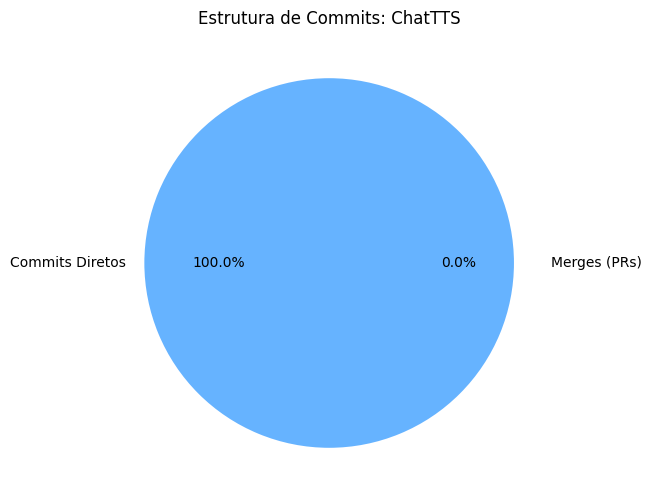

In [ ]:
# ==============================================================================
# 1. CONFIGURAÇÃO E INSTALAÇÃO
# ==============================================================================
!pip install huggingface_hub pandas matplotlib seaborn requests -q

import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from huggingface_hub import InferenceClient
import textwrap
import os

# --- SUAS CHAVES ---
HF_TOKEN = ""
GITHUB_TOKEN = ""

# Configurações do Repositório
REPO_OWNER = "2noise"
REPO_NAME = "ChatTTS"

# ==============================================================================
# 2. COLETA DE DADOS AUTOMÁTICA (Engenharia de Dados)
# ==============================================================================
print(f"📥 Baixando dados reais de {REPO_OWNER}/{REPO_NAME}...")

def get_headers():
    return {"Authorization": f"token {GITHUB_TOKEN}"} if GITHUB_TOKEN else {}

# Baixar Commits (Pega os últimos 100 para análise rápida)
url_commits = f"https://api.github.com/repos/{REPO_OWNER}/{REPO_NAME}/commits?per_page=100"
res_commits = requests.get(url_commits, headers=get_headers())

# Verificação de segurança da API do GitHub
if res_commits.status_code != 200:
    print(f"❌ Erro ao baixar commits: {res_commits.status_code}")
    print("Dica: O GitHub limita requisições anônimas. Tente usar um GITHUB_TOKEN ou espere 1h.")
    commits_data = []
else:
    commits_data = res_commits.json()

# Baixar Tags
url_tags = f"https://api.github.com/repos/{REPO_OWNER}/{REPO_NAME}/tags"
tags_data = requests.get(url_tags, headers=get_headers()).json()

if commits_data:
    # Processar Dados
    df_commits = pd.DataFrame([{
        "date": c["commit"]["author"]["date"],
        "message": c["commit"]["message"],
        "sha": c["sha"]
    } for c in commits_data if isinstance(c, dict) and "commit" in c])

    # Calcular Métricas Reais
    total_commits = len(df_commits)
    merge_commits = df_commits[df_commits['message'].str.contains("Merge pull request", case=False)].shape[0]
    direct_commits = total_commits - merge_commits

    # Evitar divisão por zero
    merge_ratio = (merge_commits / total_commits * 100) if total_commits > 0 else 0

    tag_list = [t['name'] for t in tags_data[:5]] # 5 últimas tags

    print(f"\n📊 DADOS COLETADOS:")
    print(f"- Total Commits analisados: {total_commits}")
    print(f"- Merges de PR explícitos: {merge_commits} ({merge_ratio:.1f}%)")
    print(f"- Últimas 5 Versões: {tag_list}")

    # Gerar Gráfico
    plt.figure(figsize=(6,6))
    plt.pie([merge_commits, direct_commits], labels=['Merges (PRs)', 'Commits Diretos'],
            autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], explode=(0.1, 0))
    plt.title(f"Estrutura de Commits: {REPO_NAME}")
    plt.savefig("grafico_commits.png")
    print("✅ Gráfico 'grafico_commits.png' salvo.")
else:
    print("⚠️ Falha crítica na coleta de dados. Verifique a conexão.")
    total_commits = 0
    merge_ratio = 0
    tag_list = []

# ==============================================================================
# 3. ANÁLISE COM IA GENERATIVA (A parte inteligente)
# ==============================================================================
if total_commits > 0:
    # Prompt Dinâmico com os dados coletados
    prompt_dinamico = f"""
    Aja como um Engenheiro de Software Sênior. Analise as métricas reais extraídas do repositório '{REPO_NAME}':

    DADOS TÉCNICOS:
    1. Padrão de Commit: De {total_commits} commits recentes, {merge_ratio:.1f}% foram Merges de Pull Request explícitos. A maioria ({100-merge_ratio:.1f}%) são commits diretos ou "squashed".
    2. Histórico de Versões (Tags): As últimas tags lançadas foram: {', '.join(tag_list)}.
    3. Contexto: É um projeto de IA/Deep Learning Open Source.

    TAREFA:
    Com base APENAS nesses dados, responda de forma concisa:
    A) Qual é o Branching Model? (Gitflow, GitHub Flow ou Trunk-Based?). Justifique com base na linearidade dos commits.
    B) Qual é a Estratégia de Releases? (Rapid Release, Release Train ou Ad-hoc?). Analise a periodicidade das tags para justificar.
    """

    # Lista de 3 Modelos (Para cumprir o requisito do trabalho)
    modelos = [
        "Qwen/Qwen2.5-72B-Instruct",      # O mais inteligente (China/Alibaba)
        "HuggingFaceH4/zephyr-7b-beta",   # Otimizado pela HF (Mistral based)
        "google/gemma-2-9b-it"            # Modelo do Google (Adicionado para fechar 3)
    ]

    print("\n--- INICIANDO ANÁLISE DOS MODELOS ---\n")
    client = InferenceClient(token=HF_TOKEN)

    resultados = []

    for modelo in modelos:
        print(f"🤖 Consultando IA: {modelo}...")
        try:
            msgs = [{"role": "user", "content": prompt_dinamico}]
            # Temperatura 0.2 para respostas mais técnicas e menos criativas
            res = client.chat_completion(model=modelo, messages=msgs, max_tokens=500, temperature=0.2)
            resposta_texto = res.choices[0].message.content

            print(f"\n📝 Análise do {modelo}:")
            print("-" * 60)
            print(textwrap.fill(resposta_texto, width=80))
            print("-" * 60)

            resultados.append({"Modelo": modelo, "Análise": resposta_texto})

        except Exception as e:
            print(f"❌ Erro no {modelo}: {e}")
            # Se o Google Gemma falhar, tenta um fallback
            if "google" in modelo:
                print("Tentando fallback para Phi-3...")
                try:
                    res = client.chat_completion(model="microsoft/Phi-3-mini-4k-instruct", messages=msgs, max_tokens=500)
                    print("✅ Resposta do Fallback (Phi-3):", res.choices[0].message.content[:200] + "...")
                except: pass

    # Salvar relatório final
    with open("relatorio_final_ia.txt", "w", encoding='utf-8') as f:
        f.write(f"RELATÓRIO DE ANÁLISE AUTOMATIZADA - {REPO_NAME}\n")
        f.write("="*50 + "\n\n")
        for item in resultados:
            f.write(f"MODELO: {item['Modelo']}\n")
            f.write("-" * 20 + "\n")
            f.write(f"{item['Análise']}\n\n")
            f.write("="*50 + "\n\n")

    print("\n✅ Processo concluído! Arquivos gerados:")
    print("1. grafico_commits.png (Visualização dos dados)")
    print("2. relatorio_final_ia.txt (Argumentação técnica dos modelos)")

else:
    print("Não foi possível prosseguir com a análise de IA por falta de dados.")